<a href="https://colab.research.google.com/github/Adarsh-mHere/Blinkit-Data-Analysis/blob/main/numpystudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Import raw data**

In [ ]:
df=pd.read_csv('/content/blinkit_data.csv')


**Sample Data**

In [ ]:
df.tail(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8513,Regular,DRY23,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.108568,NaN,42.9112,4.0
8514,low fat,FDA11,Baking Goods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.043029,NaN,94.7436,4.0
8515,low fat,FDK38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.053032,NaN,149.1734,4.0
8516,low fat,FDO38,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.072486,NaN,78.9986,4.0
8517,low fat,FDG32,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.175143,NaN,222.3772,4.0
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


***size of data***

In [ ]:
print("size of data",df.shape)

size of data (8523, 12)


**Data Types**

In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


**Data cleaning**

In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [ ]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [ ]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


**BUSINESS REQUIREMENTS**

**KPI'a REQUIREMENTS**

In [ ]:
#TOTAL SALES
total_sales=df['Sales'].sum()

#AVERAGE SALES
avg_sales=df['Sales'].mean()

#No of items sold
no_of_item_sold=df['Sales'].count()

#AVERAGE RATING
avg_ratings=df["Sales"].mean()

#DISPLAY

print(f"TOTAL SALES:${total_sales:,.0F}")
print(f"AVERAGE SALES:${avg_sales:,.0F}")
print(f"NO OF ITEMS SOLD:{no_of_item_sold:,.0F}")
print(f"AVERAGE RATING:{avg_ratings:,.0F}")

TOTAL SALES:$1,201,681
AVERAGE SALES:$141
NO OF ITEMS SOLD:8,523
AVERAGE RATING:141


**CHART REQUIREMENT**

Total sales by fat content

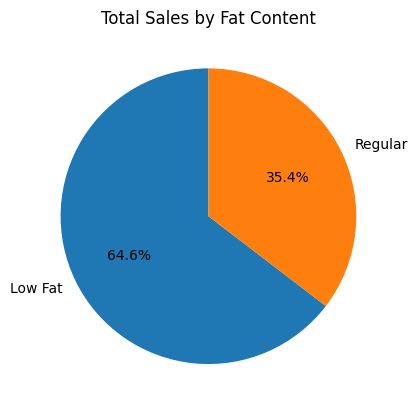

In [ ]:
sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()
plt.pie (sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.title('Total Sales by Fat Content')
plt.show()

### TOTAL SALES BY ITEM TYPE

### Total sales by item

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

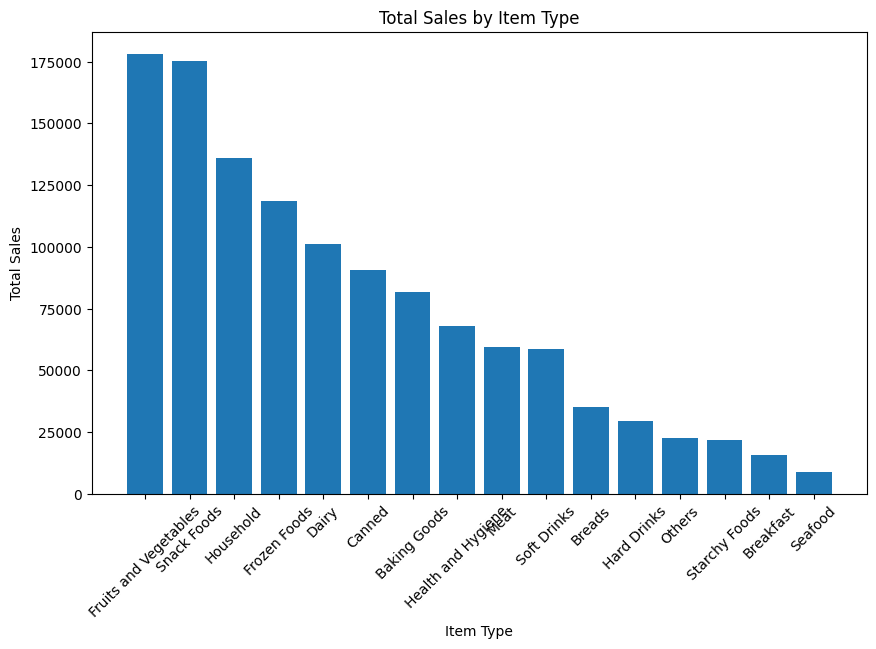

In [ ]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation=45)

Fat content by outlet for Total Sales

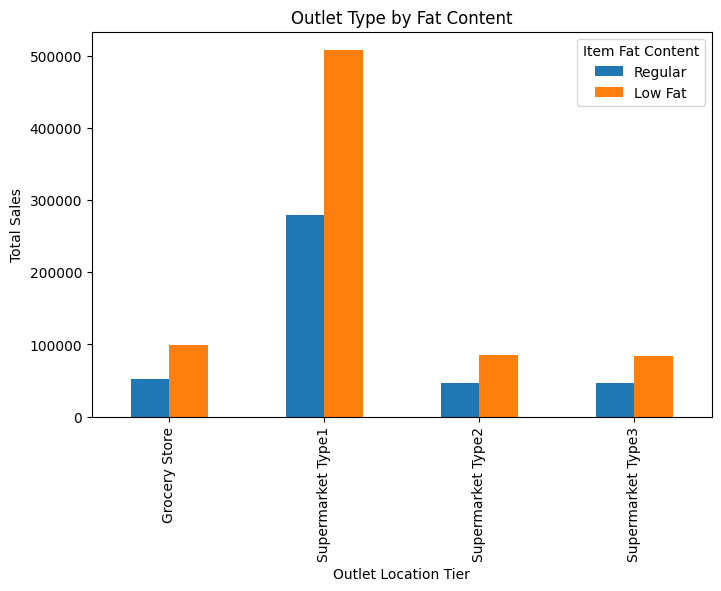

In [ ]:
grouped =df.groupby(['Outlet Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5),title='Outlet Type by Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.show()